## Introducción
Queremos modelar una batalla, y queremos hacerlo de manera muy simple. El modelo que vamos a considerar fué propuesto por Frederick Lanchester en 1916.

### Las suposiciones son las siguientes:

Hay dos lados en la batalla: azules y rojos.
Los principales factores que deciden el resultado de la batalla son
- Hay dos lados en la batalla: **azules** y **rojos**.
- Los principales factores que deciden el resultado de la batalla son el número de tropas y el entrenamiento/equipo.
- Sea $x$ el número de tropas de los **rojos** y $y$ el número de tropas de los **azules**.
- Sea $b$ la potencia de fuego de los **rojos** y sea $a$ la potencia de fuego de los **azules**.
    - La _potencia de fuego_ está basada en el entrenamiento, equipo, etc.
    
Con estas suposiciones tenemos el modelo de Lanchester:

$$
\frac{dx}{dt} = -ay
$$


$$
\frac{dy}{dt} = -bx
$$

con condiciones iniciales $x(0) = x_0$ y $y(0) = y_0$.

# Desarrollo

*   Usando **Simpy** resuelva las ecuaciones de manera explícita.




In [ ]:
import numpy as np 
from sympy import *

In [ ]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)

In [ ]:
t = Symbol('t')                          #tiempo
x = Function('x')                        #Número de tropas rojas
dx = Derivative(x(t), t)                 #Cambio de la fuerza (número) de la tropa roja

y1 = Function('y')                        #Número de tropas azules
dy = Derivative(y1(t), t)                 #Cambio de la fuerza (número) de la tropa azul


a = Symbol('a')                          #Potencia de fuego de x
b = Symbol('b')                          #Potencia de fuego de y

x0 = Symbol('x_0')                       #Simbolo de la condición inicial en x
y0 = Symbol('y_0')                       #Símbolo de la condición inicial en y

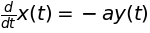

In [ ]:
ode1 = Eq(dx,-a*y1(t))                     #Vamos a declarar las ecuaciones diferenciales para ver si se puede resolver con funciones y/o métodos de Python
ode1

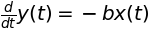

In [ ]:
ode2 = Eq(dy,-b*x(t))                     #Vamos a declarar las ecuaciones diferenciales para ver si se puede resolver con funciones y/o métodos de Python
ode2

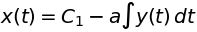

In [ ]:
dsolve(ode1)                            # Usamos el método de Python para solucionar, pero no

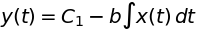

In [ ]:
dsolve(ode2)                      

In [ ]:
#Definimos la función que caracteriza al sistema para poder utilizar otros métodos de resolución

def Lanchester(estado, tiempo,a=a,b=b):
    l1 = -a*estado[1]                          # Si tomamos como condiciones iniciales coordenadas (x,y)
    l2 = -b*estado[0]
    return np.array([l1,l2])

In [ ]:
# Usaremos el método de Runge-Kutta 2. Las variables son:
# y -> el estado inicial 
# t -> tiempo
# dt -> cambio en el tiempo
# derivadas -> la función que tiene el sistema

def RK2(y, t, dt, derivadas):
    k0 = dt*derivadas(y, t)
    k1 = dt*derivadas(y + k0, t + dt)
    y_next = y + 0.5*(k0 + k1)
    
    return y_next

In [ ]:
N = 100 # -> definimos el número de steps

time = np.linspace(0,100,N)   # -> el tiempo

dt = 100/float(N-1)  # -> La variación del tiempo

y = np.zeros([N,2], dtype=Symbol)   #Este arreglo va a tener las condiciones iniciales y va a guardar las soluciones
y[0,0]=x0
y[0,1]=y0

In [ ]:
#Esto hace la resolución del método de Runge-Kutta2

for i in range(0,N-1):
    y[i+1] = RK2(y[i], time[i], dt, Lanchester)

In [ ]:
#Aquí vemos que el arreglo si tiene soluciones

y[2,0]

Para entender más cómo funciona este código retomamos un ejemplo:

Tenemos a la tropa Azul con 42 soldados y a la Tropa Roja con 30 solados. 
Hacemos a las tropas iguales de letales, es decir que su potencia de fuego es la misma.  Para neutralizar al enemigo cada 5 pasos de tiempo (1/5 = 0.2 muertes por lapso de tiempo). 

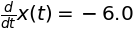

In [ ]:
Tazul = Eq(dx,-0.2*30)                     #Declaramos la escuaciones diferenciales del ejemplo
Tazul

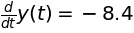

In [ ]:
TRojo = Eq(dy,-0.2*42)                     #Declaramos la escuaciones diferenciales del ejemplo
TRojo

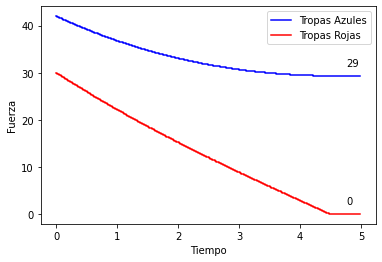

Momento en el que Tropas Azules y/o Tropas Rojas llegan a 0:  [0, 430]  de  498  momentos.


In [ ]:
import numpy
import matplotlib.pyplot as plot
from ipywidgets import interact, fixed, widgets

# Usamos el tiempo inicial para la resolución de la gráfica
#Nota: este tiempo no afecta el procedimiento, solo es para ver cómo se mueve en un transcurso determinado

TiempoInicial = 0.0
TiempoFinal = 5.0
timeStep = 0.01

steps = int((TiempoFinal - TiempoInicial) / timeStep)

# Utilizamos numpy para la simulación

azul = numpy.zeros(steps)
rojo = numpy.zeros(steps)
tiempo = numpy.zeros(steps)

#Damos el número de soldados por tropa

azul[0] = 42
rojo[0] = 30

PotenciaFuegoAzul = 0.2
PotenciaFuegoRojo = 0.2

tiempo[0] = TiempoInicial

cero=[0,0]
momentis=0;
for i in range(steps -1):
    azul[i+1] = max(0, azul[i] - timeStep * (rojo[i] * PotenciaFuegoRojo))
    rojo[i+1] = max(0, rojo[i] - timeStep * (azul[i] * PotenciaFuegoAzul))

    if(azul[i+1]<1 and cero[0]==0):
      cero[0]=i
    if(rojo[i+1]<1 and cero[1]==0):
      cero[1]=i
    momentos=i
    
    tiempo[i+1] = tiempo[i] + timeStep
    
# Tropas que quedan al final de la simulación
    
RestantesAzules = int(azul[len(azul)-1])
RestantesRojas = int(rojo[len(rojo)-1])

# Plot code.
    
plot.figure()
plot.step(tiempo, azul, '-b', where = 'post', label = 'Tropas Azules')
plot.step(tiempo, rojo, '-r', where = 'post', label = 'Tropas Rojas')
plot.ylabel('Fuerza')
plot.xlabel('Tiempo')
plot.legend()
plot.annotate(RestantesAzules,
              xy=(TiempoFinal, azul[len(azul)-1]),
              xytext=(-15,10),
              textcoords='offset points')
plot.annotate(RestantesRojas,
              xy=(TiempoFinal, rojo[len(rojo)-1]),
              xytext=(-15,10),
              textcoords='offset points')
              
plot.show()

print('Momento en el que Tropas Azules y/o Tropas Rojas llegan a 0: ', cero,' de ',momentos,' momentos.')

**Podemos observar que a pesar de que tenían la misma potencia de fuego, las tropas azules eran más y vencieron a las tropas rojas. Dejando en 0 a las tropas rojas y las tropas azules tuvieron 29 sobrevivientes, es decir, 13 muertos**

*   Deduzca e interprete la Ley de cuadrados de Lanchester.$$
x^2 - \frac{b}{a}y^2 = K,
$$para varios valores de $K$. ¿Qué sucede cuando $K=0$?



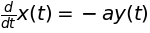

In [ ]:
ode1

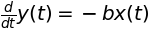

In [ ]:
ode2

Primero, multiplicamos la primer ecuación por bx y la segunda por ay
$$
(1) \ bx\frac{dx}{dt} = -bxay
$$

$$
(2) \  ay\frac{dy}{dt} =-bxay
$$
Igualamos (1) con (2)
$$
ay\frac{dy}{dt} = bx\frac{dx}{dt}
$$ 
Despejamos

$$
\frac{dy}{dx} = \frac{bx}{ay}
$$ Integramos desde la condición incial a lo largo de un periodo
$$ 
a\int_{y_0}^{y_t} y \mathrm{d}y = b\int_{x_0}^{x^t} x \mathrm{d}x
$$
Por lo que$$
ay_t^{2} - ay_0^{2}= bx_t^{2} - bx_0^{2}
$$
Así$$
ay_t^{2} - bx_t^{2} = ay_0^2 - bx_0^2
\\ $$
$$
 \quad\mathrm{Como}\quad  \frac{ay_0^2 - bx_0^2}{a} \quad\mathrm{constante, tenemos}\quad 
$$$$
(3) \ \  \  \ y_t^{2} - \frac{b}{a}x_t^{2}  = K
$$

El enfrentamiento inicia en $x_0$ y $y_0$, durante este, tanto el equipo rojo como el azul se irán aniquilando según el coeficiente a, b en el tiempo. Es decir, "ay" representa el número de bajas del equipo rojo (ya que cada soldado azul (hay "y") mata "a" rojos en una unidad de tiempo). El enfrentamiento termina cuando uno de los bandos es aniquilado por completo $x_t=0$ o $y_t=0$

De la ecuación (3) vemos que si $x$ fue eliminada obtenemos $$
y_t=\sqrt{K}
$$Por lo que $K$ es necesariamente mayor a 0. **Ganan azules**  

Pero, si $y$ fue eliminado obtenemos $$
x_t=\sqrt{-K}
$$  
Por lo que $K$ debe ser menor a 0.  **Ganan rojos**  

Por último, si $x_t=y_t=0$ entonces quiere decir que  $K=0$, es decir, si $ay_0²=bx_0^2$.  **Existe un empate**

> **Limitaciones del combate de la Ley de cuadrados de Lanchester**

> *   Asume una inteligencia perfecta, ya que ambos lados conocen la ubicación exacta del enemigo en todo momento
> *   Asume un control de fuego perfecto, ya que ambos lados pueden concentrar el fuego de la manera más eficiente
> *   Asume que las condiciones del campo de batalla son constantes, ya que las pontencias de fuego (α y ß) no se ven afectados por cambios
> *   Es un modelo determinista, ya que la misma entrada siempre dará el mismo resultado.
> *   Es un modelo homogéneo, en el que se supone que todos los elementos de una unidad de combate tienen las mismas características de combate


*   Modele combate entre guerrillas (GUERCOM): El territorio es grande y hay muchos lugares dónde esconderse. Las fuerzas azules deben de encontrar a las fuerzas rojas primero antes de inflingir daños, entre más rojos más fácil encontrarlos.$$
\frac{dx}{dt} = -axy
$$$$
\frac{dy}{dt} = -bxy
$$Explique estas ecuaciones e indique los posibles casos. ¿Qué pasa si $x_0 = 3y_0$?¿Qué tan efectivo deben de ser los azules para lograr un empate?



Este modelo representa el combate de 2 fuerzas que no tienen la ubicación de la fuerza contraria. Así mismo, no conocen el daño que han infligido al equipo contrario. Esto ahrá que concentren su fuego en una área determinada en la que creen que se encuentra el enemigo. 

Siendo 'ax' la tasa a la cuál Y aniquila a X. Esta se multiplica por Y, siendo Y la cantidad de elemenots de Y que disparan a X. 
De la misma manera, 'by' la tasa a la cuál X aniquila a Y. Esta se multiplica por X (cantidad de X que dispara a Y)

In [ ]:
#VALORES PARA EL MODELO GUERRACOM
tC = Symbol('t')                          #tiempo
xC = Function('x')                        #Número de tropas rojas 
dxC = Derivative(xC(tC), tC)                 #Cambio de la fuerza (número) de la tropa roja

y1C = Function('y')                        #Número de tropas azules
dyC = Derivative(y1C(tC), tC)                 #Cambio de la fuerza (número) de la tropa azul


aC = Symbol('a')                          #Potencia de fuego de x
bC = Symbol('b')                          #Potencia de fuego de y

x0C = Symbol('x_0')                       #Simbolo de la condición inicial en x
y0C = Symbol('y_0')                       #Símbolo de la condición inicial en y

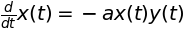

In [ ]:
ode1C = Eq(dxC,-aC*y1C(tC)*xC(tC))                     #Se declaran las ecuaciones diferenciales para ver si se puede resolver con funciones y/o métodos de Python
ode1C

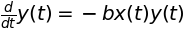

In [ ]:
ode2C = Eq(dyC,-bC*xC(tC)*y1C(tC))                     #Se decalran las ecuaciones diferenciales para ver si se puede resolver con funciones y/o métodos de Python
ode2C

In [ ]:
dsolve(ode1C)  

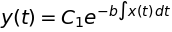

In [ ]:
dsolve(ode2C)  

In [ ]:

def LanchesterC(estado, tiempo,a=aC,b=bC):
    l1 = -a*estado[1]*estado[0]                         
    l2 = -b*estado[0]*estado[1]
    return np.array([l1,l2])

In [ ]:
def RK2(y, t, dt, derivadas):
    k0 = dt*derivadas(y, t)
    k1 = dt*derivadas(y + k0, t + dt)
    y_next = y + 0.5*(k0 + k1)
    
    return y_next

In [ ]:
N = 10 

time = np.linspace(0,100,N)   

dt = 100/float(N-1)  

yC = np.zeros([N,2], dtype=Symbol)   #Guarda las soluciones
yC[0,0]=x0C
yC[0,1]=y0C

In [ ]:

for i in range(0,N-1):
    yC[i+1] = RK2(yC[i], time[i], dt, LanchesterC)

In [ ]:

yC[1,0]

In [ ]:
#Si x0=3y0
yC2 = np.zeros([N,2], dtype=Symbol) 
yC2[0,0]=3*y0C
yC2[0,1]=y0C

for i in range(0,N-1):
    yC2[i+1] = RK2(yC2[i], time[i], dt, LanchesterC)

yC2[1,0]

Los azules deben de tener una fuerza de aniquilamiento mayor que X, asi como un mayor número de tropas si es que desean ganar. Si lo que se busca es empatar, lo que se necesita es que las condiciones iniciales sean iguales para ambas tropas. 

Para entenderlo mejor, usaremos dos ejemplos. 
* El primero en el que las fuerzas rojas 3 veces mayores a las azules. 
* El segundo en el que las fuerzas azules sean iguales a las rojas. 

In [ ]:
def plotModeloGuerraCom(a,r,pa,pr): # a=tropas azules, r=tropas rojas, pa=potencia de fuego azul, pr= potencia de fuego roja
  TiempoInicial = 0.0
  TiempoFinal = 5.0
  timeStep = 0.01

  steps = int((TiempoFinal - TiempoInicial) / timeStep)

  # Utilizamos numpy para la simulación

  azul = numpy.zeros(steps)
  rojo = numpy.zeros(steps)
  tiempo = numpy.zeros(steps)

  #Damos el número de soldados por tropa

  azul[0] =a
  rojo[0] =r

  PotenciaFuegoAzul = pa/100    # Los valores se dividen entre 100 para obtener el valor de la potencia de fuego entre 0 y 1
  PotenciaFuegoRojo = pr/100 

  tiempo[0] = TiempoInicial

  cero=[0,0]
  momentos=0
  for i in range(steps -1):
      azul[i+1] = max(0, azul[i] - timeStep * (azul[i]* rojo[i] * PotenciaFuegoRojo))
      rojo[i+1] = max(0, rojo[i] - timeStep * (rojo[i]* azul[i] * PotenciaFuegoAzul))
   
      if(azul[i+1]<1 and cero[0]==0):
        cero[0]=i
      if(rojo[i+1]<1 and cero[1]==0):
        cero[1]=i
      momentos=i

      tiempo[i+1] = tiempo[i] + timeStep
    
# Tropas que quedan al final de la simulación
    
  RestantesAzules = int(azul[len(azul)-1])
  RestantesRojas = int(rojo[len(rojo)-1])
  plot.figure()
  plot.step(tiempo, azul, '-b', where = 'post', label = 'Tropas Azules')
  plot.step(tiempo, rojo, '--r', where = 'post', label = 'Tropas Rojas')
  plot.ylabel('Fuerza')
  plot.xlabel('Tiempo')
  plot.legend()
  plot.title('Combate entre guerrillas')
  plot.annotate(RestantesAzules,
              xy=(TiempoFinal, azul[len(azul)-1]),
              xytext=(-15,10),
              textcoords='offset points')
  plot.annotate(RestantesRojas,
              xy=(TiempoFinal, rojo[len(rojo)-1]),
              xytext=(-15,10),
              textcoords='offset points')
  print('Momento en el que Tropas Azules y/o Tropas Rojas llegan a 0: ', cero,' de ',momentos,' momentos.')
    


In [ ]:
interact(plotModeloGuerraCom,a=(0,100),r=(0,100),pa=(0,100),pr=(0,100));

interactive(children=(IntSlider(value=50, description='a'), IntSlider(value=50, description='r'), IntSlider(va…



```
# Tiene formato de código
```

*  El modelo VIETNAM es la unión de los últimos dos modelos: las tropas de EU contra el Vietcong$$
\frac{dx}{dt} = -axy
$$$$
\frac{dy}{dt} = -bx,
$$donde $a$ es proporcional a la razón entre el área de un guerrillero $A_g \sim 2$ sq. ft. y el área ocupada por la guerrilla $A_x$
$$
a = c_1\frac{A_g}{A_x}
$$un guerrillero cubre aproximadamente $1,000$ sq.ft. y si están dispersados $A_x = (1,000)sq.ft. \times x_0$. $b$ representa la efectividad de la guerrilla contra una fuerza convencional, y depende de la probabilidad de que un disparo de un guerrillero mate a un soldado.$$
b = c_2p_x
$$$c_1$ y $c_2$ son las tasas de disparo (depende de la tecnología del armamento) y se suponen aproximadas $c_1 \sim c_2$. ¿Cuáles son las condiciones de empate? ¿Cuántos soldados convencionales debe de tener el ejército convencional para derrotar a la guerrilla? En Vietnam, las tropas de EUA nunca fueron mayores a las del Vietcong por más de 6 a 1. ¿Pudo haber ganado EUA?



En este modelo, una de las dos tropas es atacada por sopresa, de manera que la fuerza que embosca tiene más ventaja sobre la emboscada. En caso de que X embosque a Y, el cambio de X se vera afectado por el segundo modelo (ya que Y no sabe la ubicación de X), y el cambio de Y se verá afectado por el primer modelo (X conoce la ubicación de Y). 

Mientras Y no detrmine la localización de X, este se verá en una desventaja mayor, por lo que las probabilidades de perder son mayores. 

Este modelo nos dice que fuerzas pequeñas pueden tener una ventaja sobre fuerzas grandes cuando se les ataca por sorpresa. Asi se representa la guerra de Vietnam. Los vietnamitas atacaban por sorpresa, lo que ponía a los estadounidenses en desventaja. 


In [ ]:
#VALORES PARA EL MODELO VIETNAM
tV = Symbol('t')                          #tiempo
xV = Function('x')                        #Número de tropas rojas 
dxV = Derivative(xV(tV), tV)                 #Cambio de la fuerza (número) de la tropa roja

y1V = Function('y')                        #Número de tropas azules
dyV = Derivative(y1V(tV), tV)                 #Cambio de la fuerza (número) de la tropa azul


aV = Symbol('a')                          #Potencia de fuego de x
bV = Symbol('b')                          #Potencia de fuego de y

Ag= Symbol('A_g')                         #Area de un guerrillero 
Ax= Symbol('A_x')                         #Area ocupada por la guerrilla 
c1,c2= symbols('c_1 c_2')                 #Tasas de disparo tal que c1~c2 (aproximadas)

px= Symbol('p_x')                         #Probabilidad de que un guerrillero mate a un soldado

x0V = Symbol('x_0')                       #Simbolo de la condición inicial en x
y0V = Symbol('y_0')                       #Símbolo de la condición inicial en y

In [ ]:
#Condiciones: 
Ax=1000*x0V
aV=c1*(Ag/Ax)
bV=c2*px

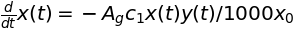

In [ ]:
ode1V = Eq(dxV,-aV*y1V(tV)*xV(tV))                     #Vamos a declarar las ecuaciones diferenciales para ver si se puede resolver con funciones y/o métodos de Python
ode1V

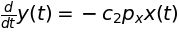

In [ ]:
ode2V = Eq(dyV,-bV*xV(tV))                     #Vamos a declarar las ecuaciones diferenciales para ver si se puede resolver con funciones y/o métodos de Python
ode2V

In [ ]:
#Ejemplos con las gráficas:

In [ ]:
#Rojos= guerrilleros


# Plot code.

def plotModelo(a,r,pa,pr): # a=tropas azules, r=tropas rojas, pa=potencia de fuego azul, pr= potencia de fuego roja
  TiempoInicial = 0.0
  TiempoFinal = 5.0
  timeStep = 0.01

  steps = int((TiempoFinal - TiempoInicial) / timeStep)

  # Utilizamos numpy para la simulación

  azul = numpy.zeros(steps)
  rojo = numpy.zeros(steps)
  tiempo = numpy.zeros(steps)

  #Damos el número de soldados por tropa

  azul[0] =a
  rojo[0] =r

  PotenciaFuegoAzul = pa/100
  PotenciaFuegoRojo = pr/100

  tiempo[0] = TiempoInicial

  cero=[0,0]
  momentos=0
  for i in range(steps -1):
      azul[i+1] = max(0, azul[i] - timeStep * (azul[i]* rojo[i] * PotenciaFuegoRojo))
      rojo[i+1] = max(0, rojo[i] - timeStep * (azul[i] * PotenciaFuegoAzul))
      
      if(azul[i+1]<1 and cero[0]==0):
        cero[0]=i
      if(rojo[i+1]<1 and cero[1]==0):
        cero[1]=i
      momentos=i

      tiempo[i+1] = tiempo[i] + timeStep
    
# Tropas que quedan al final de la simulación
    
  RestantesAzules = int(azul[len(azul)-1])
  RestantesRojas = int(rojo[len(rojo)-1])
  plot.figure()
  plot.step(tiempo, azul, '-b', where = 'post', label = 'Tropas Azules')
  plot.step(tiempo, rojo, '-r', where = 'post', label = 'Tropas Rojas (Guerrilleros)')
  plot.ylabel('Fuerza')
  plot.xlabel('Tiempo')
  plot.legend()
  plot.title('Modelo Vietnam')
  plot.annotate(RestantesAzules,
              xy=(TiempoFinal, azul[len(azul)-1]),
              xytext=(-15,10),
              textcoords='offset points')
  plot.annotate(RestantesRojas,
              xy=(TiempoFinal, rojo[len(rojo)-1]),
              xytext=(-15,10),
              textcoords='offset points')
  
  print('Momento en el que Tropas Azules y/o Tropas Rojas llegan a 0: ', cero,' de ',momentos,' momentos.')



In [ ]:
interact(plotModelo,a=(0,100),r=(0,100),pa=(0,100),pr=(0,100))

interactive(children=(IntSlider(value=50, description='a'), IntSlider(value=50, description='r'), IntSlider(va…

<function __main__.plotModelo>

*   Es posible modificar las ecuaciones para modelar combate convencional (CONCON):$$
\frac{dx}{dt} = -cx-ay+P(t)
$$$$
\frac{dy}{dt} = -bx-dy+Q(t)
$$donde ${d,c}$ son la tasa de pérdidas operacionales (enfermedades, deserciones, etc.) -proporcional al número de las tropas, y ${a,b}$ es la tasa de pérdidas en combate. ${P,Q}$ es la tasa de refuerzos. La batalla de Iwo Jima, en la segunda guerra mundial, fué modelada por Engel en 1954, aplicando estas ecuaciones y dió una comprobación empírica de las ecuaciones de Lanchester, aunque en este caso, sólo el ejército de EUA tuvo refuerzos:$$
\frac{dx}{dt} = -ay
$$$$
\frac{dy}{dt} = -bx+Q(t)
$$Resuelva las ecuaciones con $x_0 = 21,500$, $y_0=0$ y$$Q(t) = 54,000 \mathcal{U}_{[0,1]} + 6,000 \mathcal{U}_{[2,3]} + 13,000 \mathcal{U}_{[5,6]},$$donde $\mathcal{U}$ es la función escalón.



In [ ]:
#VALORES PARA EL MODELO COMBATE CONVENCIONAL
tCC = Symbol('t')                          #tiempo
xCC = Function('x')                        #Número de tropas  
dxCC = Derivative(xCC(tCC), tCC)           #Cambio de la fuerza (número) de la tropa 

y1CC = Function('y')                        #Número de tropas 
dyCC = Derivative(y1CC(tCC), tCC)           #Cambio de la fuerza (número) de la tropa 


aCC = Symbol('a')                          #Tasa de pérdida de combate
bCC = Symbol('b')                          #Tasa de pérdida de combate
cCC = Symbol('c')                          #Tasa de pérdidas operacionales (enfermedades, deserciones)
dCC = Symbol('d')                          #Tasa de pérdidas operacionales (enfermedades, deserciones)

P= Symbol('P')                            #Tasa de Refuerzos
Q= Symbol('Q')                            #Tasa de Refuerzos

x0CC = Symbol('x_0')                       #Simbolo de la condición inicial en x
y0CC = Symbol('y_0')                       #Símbolo de la condición inicial en y

In [ ]:
def CONCON(estado,tiempo,a=aCC,b=bCC):
  r1 = -a*estado[1]
  r2 = -b*estado[0] + 54000*escalon(0,1,tiempo) + 6000*escalon(2,3,tiempo) + 13000*escalon(5,6,tiempo)
  return np.array([r1,r2])


In [ ]:
def escalon(i,f,t):
  if ((t<i) or (f<t)):
    return 0
  else:   
    return 1

In [ ]:
N = 100 # -> definimos el número de steps

time = np.linspace(0,10,N)   # -> el tiempo

dt = 100/float(N-1)  # -> La variación del tiempo

yCC = np.zeros([N,2], dtype=Symbol)   #Este arreglo va a tener las condiciones iniciales y va a guardar las soluciones
yCC[0,0]=21500
yCC[0,1]=0

In [ ]:
for i in range(0,N-1):
    yCC[i+1] = RK2(yCC[i], time[i], dt, CONCON)

In [ ]:
yCC[3,1]

In [ ]:
#Ejemplo para la batalla de Iwo Jima
#AZUL=UU.SS.
#ROJOS=Japón
# Plot code.

def plotModelo(a,r,pa,pr): # a=tropas azules, r=tropas rojas, pa=potencia de fuego azul, pr= potencia de fuego roja
  TiempoInicial = 0.0
  TiempoFinal = 6.0
  timeStep = 0.01

  steps = int((TiempoFinal - TiempoInicial) / timeStep)

  # Utilizamos numpy para la simulación

  azul = numpy.zeros(steps)
  rojo = numpy.zeros(steps)
  tiempo = numpy.zeros(steps)

  #Damos el número de soldados por tropa

  azul[0] =a
  rojo[0] =r

  PotenciaFuegoAzul = pa/100
  PotenciaFuegoRojo = pr/100

  tiempo[0] = TiempoInicial

  cero=[0,0]
  momentos=0
  def escalonTemp(t,x):
    if x==t:
      return 1
    else:
      return 0
  for i in range(steps -1):
      fesc=54*(escalonTemp(0,i/100)) + 6*escalonTemp(2,i/100) + 13*escalonTemp(5,i/100)
      azul[i+1] = max(0, azul[i] -(timeStep * (rojo[i] * PotenciaFuegoAzul))+fesc)
      rojo[i+1] = max(0, rojo[i] - timeStep * ((azul[i] * PotenciaFuegoRojo)))
   
      if(azul[i+1]<1 and cero[0]==0):
        cero[0]=i
      if(rojo[i+1]<1 and cero[1]==0):
        cero[1]=i
      momentos=i

      tiempo[i+1] = tiempo[i] + timeStep
    
# Tropas que quedan al final de la simulación
    
  RestantesAzules = int(azul[len(azul)-1])
  RestantesRojas = int(rojo[len(rojo)-1])
  plot.figure()
  plot.step(tiempo, azul, '-b', where = 'post', label = 'Tropas Azules')
  plot.step(tiempo, rojo, '-r', where = 'post', label = 'Tropas Rojas')
  plot.ylabel('Fuerza')
  plot.xlabel('Tiempo')
  plot.legend()
  plot.title('UU.SS vs Japón')
  plot.annotate(RestantesAzules,
              xy=(TiempoFinal, azul[len(azul)-1]),
              xytext=(-15,10),
              textcoords='offset points')
  plot.annotate(RestantesRojas,
              xy=(TiempoFinal, rojo[len(rojo)-1]),
              xytext=(-15,10),
              textcoords='offset points')
  
  print('Momento en el que Tropas Azules y/o Tropas Rojas llegan a 0: ', cero,' de ',momentos,' momentos.')

In [ ]:
interact(plotModelo,a=(0,100),r=(0,100),pa=(0,100),pr=(0,100))

interactive(children=(IntSlider(value=50, description='a'), IntSlider(value=50, description='r'), IntSlider(va…

<function __main__.plotModelo>

* Encuentre los valores de  a  y  b  para ajustar los datos empíricos mostrados en la figura siguiente:
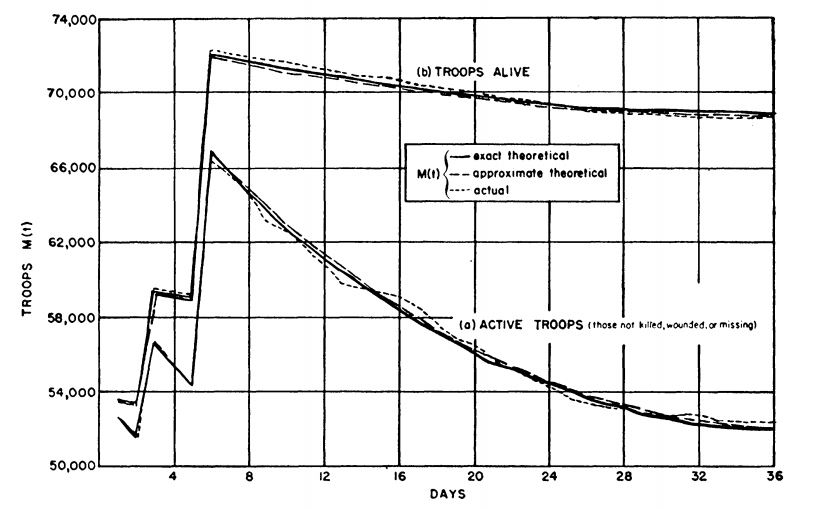

In [ ]:
import numpy as np
import scipy.stats as st

In [ ]:
xN = 0
x0 = 21500
mt = 2037000
B = (x0-xN)/mt
B

In [ ]:
#Ñ(t)=N(0)-B*(Sum(M(s),(s,1,t))) ##Debe dar 372500 aprox

In [ ]:
#A=(Sum(P(t)-M(t),(t,0,36)))/(((N(0)+N(36))*(36+1))/2)
A=(73000-52735)/372500
A

In [ ]:
# Simulación con A y B
interact(plotModelo,a=A,r=(0,100),pa=(0,100),pr=(0,100))

interactive(children=(FloatSlider(value=0.05440268456375839, description='a', max=0.16320805369127517, min=-0.…

<function __main__.plotModelo>

In [ ]:
def CONCON0(estado,tiempo,a=A,b=B):
  r1 = -a*estado[1]
  r2 = -b*estado[0] + 54000*escalon(0,1,tiempo) + 6000*escalon(2,3,tiempo) + 13000*escalon(5,6,tiempo)
  return np.array([r1,r2])

In [ ]:
N = 100 # -> definimos el número de steps

time = np.linspace(0,10,N)   # -> el tiempo

dt = 100/float(N-1)  # -> La variación del tiempo

yCC0 = np.zeros([N,2])   #Este arreglo va a tener las condiciones iniciales y va a guardar las soluciones
yCC0[0,0]=21500
yCC0[0,1]=0

In [ ]:
for i in range(0,N-1):
    yCC0[i+1] = RK2(yCC0[i], time[i], dt, CONCON0)

* Si no hubiera habido refuerzos, ¿cuál hubiera sido el resultado de la batalla?

In [ ]:
def CONCON1(estado,tiempo):
  r1 = -0.05440268456375839*estado[1]
  r2 = -0.01055473735886107*estado[0]
  return np.array([r1,r2])

In [ ]:
N = 100 # -> definimos el número de steps

time = np.linspace(0,10,N)   # -> el tiempo

dt = 100/float(N-1)  # -> La variación del tiempo

yCC2 = np.zeros([N,2])   #Este arreglo va a tener las condiciones iniciales y va a guardar las soluciones
yCC2[0,0]=21500
yCC2[0,1]=0

In [ ]:
for i in range(0,N-1):
    yCC2[i+1] = RK2(yCC2[i], time[i], dt, CONCON1)

Text(0.5, 1.0, 'Simulación de derrota norteamericana')

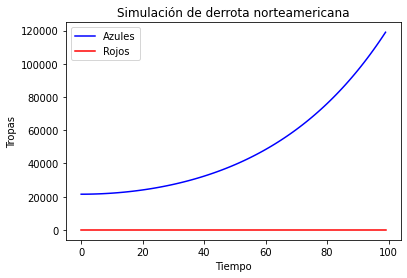

In [ ]:
X2 = [yCC2[i,0] if yCC2[i,0] >= 0 else 0 for i in range(N) ]
Y2 = [yCC2[i,1] if yCC2[i,1] >= 0 else 0 for i in range(N)]
tiempo = [i for i in range(len(X2))]
plot.plot(tiempo,X2, '-b', label = "Azules")
plot.plot(tiempo,Y2, '-r', label = "Rojos")
plot.ylabel('Tropas')
plot.xlabel('Tiempo')
plot.legend()
plot.title('Simulación de derrota norteamericana')

* ¿Puede sugerir (buscando alguna referencia de tropas cercanas japonesas) cómo intervenir para ganar esta batalla?

> La mejor estrategía sería agregar refuerzos al ejercito japonés y que sean mayores que los estadounidenses

In [ ]:
def CONCON2(estado,tiempo,a=A,b=B):
  r1 = -a*estado[1] + 58000*escalon(0,1,tiempo) + 10000*escalon(2,3,tiempo) + 20000*escalon(5,6,tiempo)
  r2 = -b*estado[0] + 54000*escalon(0,1,tiempo) + 6000*escalon(2,3,tiempo) + 13000*escalon(5,6,tiempo)
  return np.array([r1,r2])

In [ ]:
N = 100 # -> definimos el número de steps

time = np.linspace(0,10,N)   # -> el tiempo

dt = 100/float(N-1)  # -> La variación del tiempo

yCC1 = np.zeros([N,2])   #Este arreglo va a tener las condiciones iniciales y va a guardar las soluciones
yCC1[0,0]=21500
yCC1[0,1]=0

In [ ]:
for i in range(0,N-1):
    yCC1[i+1] = RK2(yCC1[i], time[i], dt, CONCON2)

Text(0.5, 1.0, 'Simulación de derrota norteamericana')

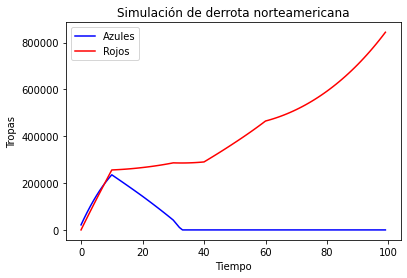

In [ ]:
X1 = [yCC1[i,0] if yCC1[i,0] >= 0 else 0 for i in range(N) ]
Y1 = [yCC1[i,1] if yCC1[i,1] >= 0 else 0 for i in range(N)]
tiempo = [i for i in range(len(X1))]
plot.plot(tiempo,X1, '-b', label = "Azules")
plot.plot(tiempo,Y1, '-r', label = "Rojos")
plot.ylabel('Tropas')
plot.xlabel('Tiempo')
plot.legend()
plot.title('Simulación de derrota norteamericana')

**This is Sparta!**

*    Es posible simular la batalla del Termópilas: Suponga que sólo $C$ unidades de cada lado caben en el estrecho (o paso) de Termópilas, entonces las ecuaciones se convierten en$$
\frac{dx}{dt} = -a \min(y,C)
$$$$
\frac{dy}{dt} = -b \min(x,C)
$$Separe en cuatro casos el espacio $x-y$ y dibuje las regiones de manera analítica. ¿Obtiene el mismo resultado numérico? Utilice los datos "históricos" ¿El resultado es parecido a la vida real?



In [ ]:
#VALORES PARA EL MODELO DE LA BATALLA DEL TERMOPILAS
tBT = Symbol('t')                          #tiempo
xBT = Function('x')                        #Número de tropas  
dxBT = Derivative(xBT(tBT), tBT)           #Cambio de la fuerza (número) de la tropa 

yBT = Function('y')                        #Número de tropas 
dyBT = Derivative(yBT(tBT), tBT)           #Cambio de la fuerza (número) de la tropa 

aBT = Symbol('a')                          #Tasa de pérdida de combate
bBT = Symbol('b')                          #Tasa de pérdida de combate
cBT = Symbol('C')                          #Unidades de cada lado que caben en el estrecho

minx=Symbol('min(x,C)')
miny=Symbol('min(y,C)')


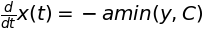

In [ ]:
ode1BT = Eq(dxBT,-aBT*miny)                     #Se declaran las ecuaciones diferenciales para ver si se puede resolver con funciones y/o métodos de Python
ode1BT

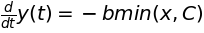

In [ ]:
ode2BT = Eq(dyBT,-bBT*minx)                     #Se declaran las ecuaciones diferenciales para ver si se puede resolver con funciones y/o métodos de Python
ode2BT

In [ ]:
  griegos=7500
  persas=200000

In [ ]:
def Termopilas(a,r,pa,pr,C): # a=tropas azules, r=tropas rojas, pa=potencia de fuego azul, pr= potencia de fuego roja, C=unidades en el estrecho
  TiempoInicial = 0.0
  TiempoFinal = 5.0
  timeStep = 0.01

  steps = int((TiempoFinal - TiempoInicial) / timeStep)

  # Utilizamos numpy para la simulación

  azul = numpy.zeros(steps)
  rojo = numpy.zeros(steps)
  tiempo = numpy.zeros(steps)

  #Damos el número de soldados por tropa

  azul[0] =a
  rojo[0] =r

  PotenciaFuegoAzul = pa/100    # Los valores se dividen entre 100 para obtener el valor de la potencia de fuego entre 0 y 1
  PotenciaFuegoRojo = pr/100 

  tiempo[0] = TiempoInicial

  cero=[0,0]
  momentos=0
  for i in range(steps -1):
      minazul = min(C, azul[i])
      minrojo = min(C, rojo[i])
      azul[i+1] = max(0, azul[i] - timeStep * (minrojo * PotenciaFuegoRojo))
      rojo[i+1] = max(0, rojo[i] - timeStep * (minazul * PotenciaFuegoAzul))
   
      if(azul[i+1]<1 and cero[0]==0):
        cero[0]=i
      if(rojo[i+1]<1 and cero[1]==0):
        cero[1]=i
      momentos=i

      tiempo[i+1] = tiempo[i] + timeStep
    
# Tropas que quedan al final de la simulación
    
  RestantesAzules = int(azul[len(azul)-1])
  RestantesRojas = int(rojo[len(rojo)-1])
  plot.figure()
  plot.step(tiempo, azul, '-b', where = 'post', label = 'Tropas Azules')
  plot.step(tiempo, rojo, '--r', where = 'post', label = 'Tropas Rojas')
  plot.ylabel('Tropas')
  plot.xlabel('Tiempo')
  plot.legend()
  plot.title('Guerra de Termópilas')
  plot.annotate(RestantesAzules,
              xy=(TiempoFinal, azul[len(azul)-1]),
              xytext=(-15,10),
              textcoords='offset points')
  plot.annotate(RestantesRojas,
              xy=(TiempoFinal, rojo[len(rojo)-1]),
              xytext=(-15,10),
              textcoords='offset points')
  print('Guerra de Termopilas')
    


In [ ]:
interact(Termopilas,a=(0,100),r=(0,100),pa=(0,100),pr=(0,100), C=(0,100))

interactive(children=(IntSlider(value=50, description='a'), IntSlider(value=50, description='r'), IntSlider(va…

<function __main__.Termopilas>

**Agentes**

*   Use la clase agente para modelar el último escenario, suponga únicamente combate cuerpo a cuerpo, asigne una probabilidad de herir, morir y matar para los agentes que estén uno enfrente de otro. Agregue un valor de cohesión / miedo. Si pasa de un límite el miedo huye el agente. Agregue un atributo de moral. ¿Los resultados coinciden con el modelo de Lanchester?



In [ ]:
import random
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [ ]:
class Agente:
    def __init__(self, tipo, limite_m, max_dist, locacion = np.array([random.uniform(0, 1), random.uniform(0, 1)])):
        self.tipo = tipo   #asignamos un tipo de agente
        self.limite_m = limite_m  #Hay un miedo límite 
        self.max_dist = max_dist  # Distancia máxima para poder atacar
        self.locacion = locacion   #Ubicación
        self.siguiente_accion = None
        self.miedo = 0    #El miedo que tiene el agente
        self.moralidad = 0 # Tienen una moralidad
    
    def miedo(self):
        self.miedo = random.uniform(0,1) #Le asigna un miedo a cada agente
         
    def moralidad(self):
        self.moralidad = random.uniform(0,1)  # Le asigna una moralidad 
    
    def distancia(self, otroc1):
        return np.linalg.norm(self.locacion - otroc1.locacion) #Obtiene la distancia entre un agente y otro
    
    def morir(self, agentes):
        agentes.pop(agentes.index(self)) #Si lo matan, de la lista de agentes retiramos al agente que estamos analizando
        
    def matar(self, otroc, otro):
        otro.pop(otro.index(otroc))   #Si mata o hiere retiramos al otro agente de la lista 
    
    def herir(self, otroc, otro):
        otro.pop(otro.index(otroc))   #Si mata o hiere retiramos al otro agente de la lista
    
    def actuar(self,otro):
        
        p1 = [1,2,3,4]   # Estas listas nos sirven para manejar la probabilidad con que ocurre la muerte, el homicidio o las lesiones 
        p2 = [1,2,3]
        otroc = random.choice(otro)   #Elegimos otro agente aleatorio de la lista de agentes
        if self.tipo != otroc.tipo:   # Si el tipo del agente que estamos manejando y el otro son el mismo, te mueves. No haces nada con los de tu bando
          if self.distancia(otroc) < self.max_dist:   # Mide si está lo suficientemente cerca del otro como para hacer algo
              if self.miedo < self.limite_m:  # Y evalúa el miedo
                  if self.moralidad < 0.5: # La moralidad va a cero si es "malo", va a 1 si es bueno. Es neutral en 0.5
                      accion = random.choice(p1)  #En este caso, es más malo que bueno por lo que matará con p : 0.25 y herirá con p : 0.25, morirá con las misma probabilidad que hiere
                      if accion <= 2:
                          self.matar(otroc, otro)
                      elif accion == 3:
                          self.herir(otroc, otro)
                      else:
                          self.morir(otro)
                  elif self.moralidad == 0.5:
                      accion = random.choice(p2)
                      if accion == 1:
                          self.matar(otroc, otro)
                      elif accion == 2:
                          self.herir(otroc, otro)
                      else:
                          self.morir(otro)
                  else:
                      accion = random.choice(p2)
                      if accion <= 2:
                          self.morir(otro)
                      elif accion == 3:
                          self.herir(otroc, otro)
                      else:
                          self.matar(otroc, otro)
                  self.locacion = self.moverse() #Al final de cualquier caso, se mueve
              else:
                  self.locacion = self.moverse() # Si su miedo es más grande del máximo para atacar, se mueve
          else:
              self.locacion = self.moverse() # Si la distancia es muy grande, se mueve
        else: 
          self.locacion = self.moverse() # Si es del mismo bando se mueve

    def moverse(self):
        self.siguiente_accion = np.array([random.uniform(0, 1), random.uniform(0, 1)])  #Aquí vemos el cambio de coordenadas
        return self.siguiente_accion
        
    def actualizar(self, agentes):
        self.actuar(agentes)   # Ejecuta las acciones

NameError: ignored

In [ ]:
class Mundo:
    def __init__(self, agentes, ancho=8, alto=8, steps = 20):
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        self.agentes = agentes
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', **plot_args)
       
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) # Dibuja el mundo
        
        for agente in self.agentes:
            agente.actualizar(self.agentes)
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func=self.clean_screen, frames=self.steps, interval=1000, blit=False)
        return anim

In [ ]:
class Batalla(Mundo):

    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos_0, = self.ax.plot([], [], 'o', markerfacecolor='red', **plot_args)
        self.puntos_1, = self.ax.plot([], [], 'o', markerfacecolor='blue', **plot_args)
    
    def clean_screen(self):
        self.puntos_0.set_data([], [])
        self.puntos_1.set_data([], [])
        return 
    
    def dibujar(self,step):
   
        x_values_0, y_values_0 = [], []
        x_values_1, y_values_1 = [], []
    
        for agente in self.agentes:
            x, y = agente.locacion
            if agente.tipo == 0:
                x_values_0.append(x)
                y_values_0.append(y)
            else:
                x_values_1.append(x)
                y_values_1.append(y)

                
        self.puntos_0.set_data(x_values_0, y_values_0)
        self.puntos_1.set_data(x_values_1, y_values_1)
        
        self.ax.set_title('Paso {}'.format(step))

        return 

In [ ]:
no_rojos = 800
no_azules = 800

agentes1 = [Agente(tipo = 0, limite_m = 1,max_dist = 1) for i in range(no_rojos)]
agentes1.extend(Agente(tipo = 1, limite_m = 1, max_dist = 1) for i in range(no_azules))

batalla = Batalla(agentes = agentes1)

simular_batalla = batalla.simular()

In [ ]:
HTML(simular_batalla.to_html5_video())

NameError: ignored

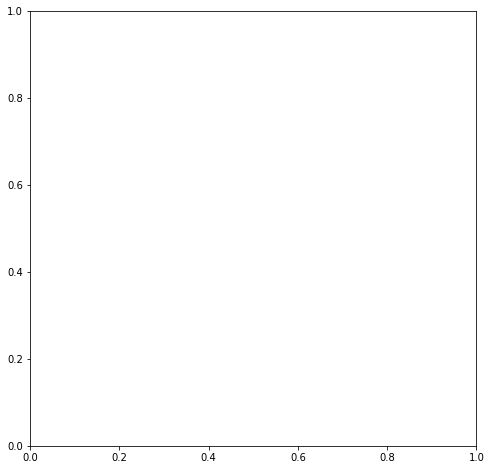

In [ ]:
no_rojos1 = 900
no_azules1 = 800

agentes2 = [Agente(tipo = 0, limite_m = 1,max_dist = 1) for i in range(no_rojos1)]
agentes2.extend(Agente(tipo = 1, limite_m = 1, max_dist = 1) for i in range(no_azules1))

batalla1 = Batalla(agentes = agentes2)

simular_batalla1 = batalla1.simular()

In [ ]:
HTML(simular_batalla1.to_html5_video())

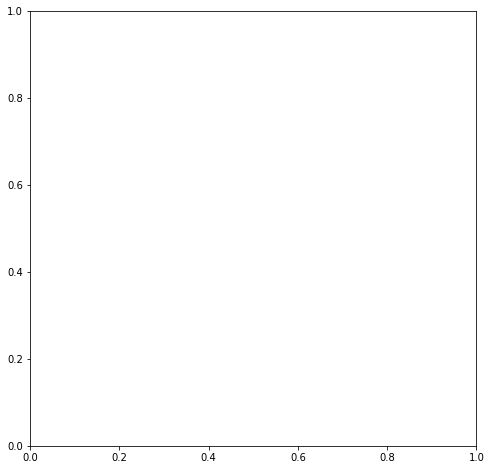

In [ ]:
no_rojos2 = 500
no_azules2 = 1000

agentes3 = [Agente(tipo = 0, limite_m = 1,max_dist = 1) for i in range(no_rojos2)]
agentes3.extend(Agente(tipo = 1, limite_m = 1, max_dist = 1) for i in range(no_azules2))

batalla2 = Batalla(agentes = agentes3)

simular_batalla2 = batalla2.simular()

In [ ]:
HTML(simular_batalla2.to_html5_video())



> Anotaciones sobre la simulación anterior:


> *   En el modelo de lanchester no contempla ningun factor de miedo, moralidad o distancia de ataque, mientras que la simulación que realizamos considera los 3 rubros anteriores. En ese sentido, si establecieramos que no importa la distancia o el miedo, podríamos acercarnos al modelo; sin embargo, el factor de moralidad juega un papel importante pues dependiendo de su valor, que es aleatorio, los eventos de morir, matar o herir tienen distinta probabilidad de ocurrir. 

> * Además, el modelo de Lanchester considera agentes homogeneos; es decir, con características iguales en cada uno de ellos y, en este caso, varían la moralidad y el miedo por agente. 

> * Por lo anterior, esta simulación no es consistente con el modelo de lanchester




# **Preguntas Extras**




*   ¿Cómo modelaría fatiga o abastecimiento en Lanchester?





In [ ]:
TiempoInicial = 0.0
TiempoFinal = 3.0
timeStep = 0.01
    
steps = int((TiempoFinal)/timeStep)    
arr1 = np.random.rand(steps) #Ponemos estos arreglos afuera ya que al usar el interact ejecuta de nuevo toda la función
arr2 = np.random.rand(steps) 
arr3 = np.random.rand(steps)
arr4 = np.random.rand(steps)
def plotModeloFatAbas(a, r, pa, pr, dR, dA, caR, caA, rrR, rrA, rfR, rfA):
    """
    dR son los dias en que se tarda el abastecimiento de soldados en llegar para el equipo rojo
    dA son los dias en que se tarda el abastecimiento de soldados en llegar para el equipo azul
    caR es la cantidad de abastecimiento del equipo rojo 
    caA es la cantidad de abastecimiento del equipo azul
    rrR es el ritmo de recuperación del equipo rojo
    rrA es el ritmo de recuperación del equipo azul
    rfR es el ritmo de fatiga del equipo rojo
    rfA es el ritmo de fatiga del equipo azul
    """
    azul = np.zeros(steps)
    rojo = np.zeros(steps)
    tiempo = np.zeros(steps)
    
    azul[0] = a
    rojo[0] = r
    
    PotenciaFuegoAzul = pa/100
    PotenciaFuegoRojo = pr/100
    
    tiempo[0] = TiempoInicial
    
    EventosFatigaAzul = arr1*rfA 
    EventosFatigaRojo = arr2*rfR 
    EventosRecuperaciónAzul = arr3*rrA 
    EventosRecuperaciónRojo = arr4*rrR
    """
    De los arreglos aleatorios que hicimos afuera de la función tenemos valores entre 0 y 1
    Nosotros con las variables de los ritmos de fatiga y recuperación podemos controlar de cierta manera
    si un equipo se cansa más rápido o si se recupera más rápido a pesar de que los valores sean aleatorios
    No son los mismos para hacerlo mas divertido :)
    """
    CondiciónRojo = np.zeros(steps)
    CondiciónAzul = np.zeros(steps)
    CondiciónRojo[0] = 1
    CondiciónAzul[0] = 1
    """
    Vamos a suponer que la condición de los soldados empieza al máximo y que no afecta en sus primer
    enfrentamiento entre ambos
    """
    cero = [0,0]
    momentos = 0
    for i in range(steps - 1):
      FatigaRojo = CondiciónRojo[i]
      FatigaAzul = CondiciónAzul[i]
      CondiciónRojo[i+1] = max(0.1, min(1, CondiciónRojo[i]-EventosFatigaRojo[i]+EventosRecuperaciónRojo[i]))
      CondiciónAzul[i+1] = max(0.1, min(1, CondiciónAzul[i]-EventosFatigaAzul[i]+EventosRecuperaciónAzul[i]))
      """
      De la FatigaRojo y FatigaAzul se puede ver que tan fatigados estan los soldados
      Tenemos los parámetros de que no puede ser menor a 0.1 y mayor a 1.
      La condición de los soldados del siguiente día depende de la recuperación que tuvo ese día
      y que tan fatigados estuvieron ese día
      """
      if i%dR == 0:
          RojoAbas = rojo[i]*caR
          rojo[i] = rojo[i] + RojoAbas
          if azul[i] == 0:
            rojo[i] = rojo[i] - RojoAbas
      if i%dA == 0:
          AzulAbas = azul[i]*caA
          azul[i] = azul[i] + AzulAbas
          if rojo[i] == 0:
            azul[i] = azul[i] - AzulAbas
      """
      Esto se refiere al abastecimiento. Los dA y dA se refieren a cada cuantos días les llega a cada 
      equipo el abastecimiento de soldados
      Los caR y caA se refiere a la cantidad del abastecimiento que le va a llegar ambos equipos. Estos
      estan determinados por la cantidad de soldados que tienen en ese momento
      En el momento en que un equipo esta exterminado se dejaran de enviar soldados
      """
      azul[i+1] = max(0, azul[i] - timeStep * (rojo[i]*PotenciaFuegoRojo*(FatigaRojo/FatigaAzul)))
      rojo[i+1] = max(0, rojo[i] - timeStep * (azul[i]*PotenciaFuegoAzul*(FatigaAzul/FatigaRojo)))
      """
      Aqui podemos ver que el que tan fatigados estan los soldados afecta directamente a la potencia
      de fuego que pueda llegar a tener un equipo
      """

      if(azul[i+1]<1 and cero[0]==0):
          cero[0]=i
      if(rojo[i+1]<1 and cero[1]==0):
          cero[1]=i
      momentos=i
        
      tiempo[i+1] = tiempo[i] + timeStep
        
    RestantesAzules = int(azul[len(azul)-1])
    RestantesRojas = int(rojo[len(rojo)-1])
    plot.figure()
    plot.step(tiempo, azul, '-b', where = 'post', label = 'Tropas Azules')
    plot.step(tiempo, rojo, '--r', where = 'post', label = 'Tropas Rojas')
    plot.ylabel('Fuerza')
    plot.xlabel('Tiempo')
    plot.legend()
    plot.title('Azules mayores que Rojos')
    plot.annotate(RestantesAzules,
                  xy=(TiempoFinal, azul[len(azul)-1]),
                  xytext=(-15,10),
                  textcoords='offset points')
    plot.annotate(RestantesRojas,
                  xy=(TiempoFinal, rojo[len(rojo)-1]),
                  xytext=(-15,10),
                  textcoords='offset points')
    print('Momento en el que Tropas Azules y/o Tropas Rojas llegan a 0: ', cero,' de ',momentos,' momentos.')

In [ ]:
interact(plotModeloFatAbas, a = (0, 10000), r = (0, 10000), pa = (0, 100), pr = (0, 100), dR = (7, 30), dA = (7, 30), caR = (0.00, 1.00), caA = (0.00, 1.00), rrR = (0.5, 2.0), rrA = (0.5, 2.0), rfR = (0.5, 1.5), rfA = (0.5, 1.5))

interactive(children=(IntSlider(value=5000, description='a', max=10000), IntSlider(value=5000, description='r'…

<function __main__.plotModeloFatAbas>



*   ¿Cómo incluiría a un tercer combatiente? ¿Se ve afectadas las ecuaciones si los rojos tienen fuerzas regulares e irregulares?



In [ ]:
def plotModeloTercerCombatiente(a,r,v,pa,pr,pv, pAR, pRV, pVA, fCR, fGR, fSR):
  """
  pAR es proporción de ataque del azul al rojo
  pRV es proporción de ataque del rojo al verde
  pVA es proporción de ataque del verde al azul
  fCR es fuerza de Capitanes Rojos
  fGR es fuerza de Generales Rojos
  fSR es fuerza de Soldados Rojos
  """
  TiempoInicial = 0.0
  TiempoFinal = 5.0
  timeStep = 0.01

  steps = int((TiempoFinal - TiempoInicial) / timeStep)

  rojo = numpy.zeros(steps)
  azul = numpy.zeros(steps)
  verde = numpy.zeros(steps)
  tiempo = numpy.zeros(steps)

  CapitanesRojos = numpy.zeros(steps)
  GeneralesRojos = numpy.zeros(steps)
  SoldadosRojos = numpy.zeros(steps)
  CapitanesRojos[0] = 0.1*r
  GeneralesRojos[0] = 0.2*r
  SoldadosRojos[0] = 0.7*r
  
  rojo[0] = r
  azul[0] =a
  verde[0] = v
  PotenciaFuegoAzul = pa/100   
  PotenciaFuegoRojo = pr/100 
  PotenciaFuegoVerde = pv/100
    
  pAV = 1 - pAR
  pRA = 1 - pRV
  pVR = 1 - pVA

  tiempo[0] = TiempoInicial

  cero=[0,0,0]
  momentos=0
  for i in range(steps -1):
      AtaqueAlAzul = pRA * rojo[i] * PotenciaFuegoRojo + pVA * verde[i] * PotenciaFuegoVerde
      AtaqueAlRojo = pAR * azul[i] * PotenciaFuegoAzul + pVR * verde[i] * PotenciaFuegoVerde
      AtaqueAlVerde = pAV * azul[i] * PotenciaFuegoAzul + pRV * rojo[i] * PotenciaFuegoRojo
      
      """
      Aquí juntamos todos los daños que sufrira cada equipo
      """

      CapitanesRojos[i+1] = max(0, CapitanesRojos[i] - timeStep * AtaqueAlRojo*fCR)
      GeneralesRojos[i+1] = max(0, GeneralesRojos[i] - timeStep * AtaqueAlRojo*fGR)
      SoldadosRojos[i+1] = max(0, SoldadosRojos[i] - timeStep * AtaqueAlRojo*fSR)
      azul[i+1] = max(0, azul[i] - timeStep * AtaqueAlAzul)
      verde[i+1] = max(0, verde[i] - timeStep* AtaqueAlVerde)

      rojo[i+1] = CapitanesRojos[i+1] + GeneralesRojos[i+1] + SoldadosRojos[i+1]

   
      if(azul[i+1]<1 and cero[0]==0):
        cero[0]=i
      if(rojo[i+1]<1 and cero[1]==0):
        cero[1]=i
      if(verde[i+1]<1 and cero[2]==0):
        cero[2]=i
      momentos=i

      tiempo[i+1] = tiempo[i] + timeStep
    
    
  RestantesAzules = int(azul[len(azul)-1])
  RestantesRojas = int(rojo[len(rojo)-1])
  RestantesVerdes = int(verde[len(verde)-1])
  plot.figure()
  plot.step(tiempo, azul, '-b', where = 'post', label = 'Tropas Azules')
  plot.step(tiempo, rojo, '--r', where = 'post', label = 'Tropas Rojas')
  plot.step(tiempo, verde, '-.g', where = 'post', label = 'Tropas Verdes')
  plot.ylabel('Fuerza')
  plot.xlabel('Tiempo')
  plot.legend()
  plot.title('Azules mayores que Rojos')
  plot.annotate(RestantesAzules,
              xy=(TiempoFinal, azul[len(azul)-1]),
              xytext=(-15,10),
              textcoords='offset points')
  plot.annotate(RestantesRojas,
              xy=(TiempoFinal, rojo[len(rojo)-1]),
              xytext=(-15,10),
              textcoords='offset points')
  plot.annotate(RestantesVerdes,
              xy=(TiempoFinal, verde[len(verde)-1]),
              xytext=(-15,10),
              textcoords='offset points')

In [ ]:
interact(plotModeloTercerCombatiente, a= (0, 500),r=(0, 500),v=(0, 500),pa=(0,100),pr=(0,100),pv=(0,100), pAR=(0.0,1.0), pRV=(0.0,1.0), pVA=(0.0,1.0), fCR=(0.0,1.0), fGR=(0.0,1.0), fSR=(0.0,1.0))

interactive(children=(IntSlider(value=250, description='a', max=500), IntSlider(value=250, description='r', ma…

<function __main__.plotModeloTercerCombatiente>


# **Bibliografía**

- **Wikipedia** [Lanchester laws](https://en.wikipedia.org/wiki/Lanchester%27s_laws)
- **J.H. Engel** A verification of Lanchester's Law Journal of the Operations Research Society of America, Vol. 2, No. 2. (May, 1954), pp. 163-171
- **Alex Chen** This Means War! Modeling Combat with Applications to Real Time Strategy Games (2012)
- **Marcin Waniek** An Agent-Based Simulation of the Battle of Kokenhausen